In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout # optionally we can remove dropout from our layers
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Initialising the Neural Network
classifier = Sequential()

In [3]:
#Convolution
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        input_shape = [128, 128, 3],
                        activation = 'relu'))

In [4]:
#Pooling
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))

In [5]:
#Adding additional layers
# Second convolution layer
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Third convolution layer
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Fourth convolution layer
classifier.add(Conv2D(filters = 32,
                        kernel_size = 3,
                        activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(MaxPool2D(pool_size = 2,
                        strides = 2))


In [6]:
#Flattening
classifier.add(Flatten())

In [7]:
#Full connection (output layer)
classifier.add(Dense(units = 32,
                   activation = 'relu'))
classifier.add(Dense(units = 1,
                activation = 'sigmoid'))

In [8]:
#Compiling the neural network
#using optimize1(RMSprop)
classifier.compile(optimizer = RMSprop(),
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0

In [10]:
#Importing train and test images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

normal


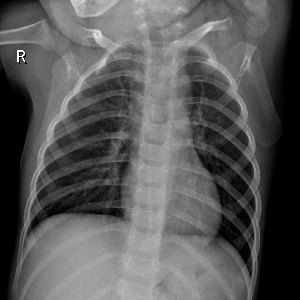

In [11]:
#show images from our data set 
from keras.preprocessing import image
first_image=image.load_img('A:/downloads/archive/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg', target_size=(300,300))
print("normal")
first_image

PNEUMONIA


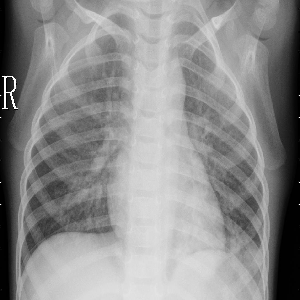

In [12]:
second_image=image.load_img('A:/downloads/archive/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg', target_size=(300,300))
print("PNEUMONIA")
second_image

In [13]:
#preprocessing the data
training_set = train_datagen.flow_from_directory('A:/downloads/archive/chest_xray/chest_xray/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('A:/downloads/archive/chest_xray/chest_xray/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [15]:
#Fitting the classifier to the dataset
history=classifier.fit(x = training_set,
                epochs = 15,
                validation_data = test_set)

Epoch 1/15
163/163 [==============================] - 293s 2s/step - loss: 0.5502 - accuracy: 0.7430 - val_loss: 0.4862 - val_accuracy: 0.8189
Epoch 2/15
163/163 [==============================] - 144s 884ms/step - loss: 0.3433 - accuracy: 0.8547 - val_loss: 0.4534 - val_accuracy: 0.7821
Epoch 3/15
163/163 [==============================] - 142s 872ms/step - loss: 0.2678 - accuracy: 0.8912 - val_loss: 0.3611 - val_accuracy: 0.8606
Epoch 4/15
163/163 [==============================] - 149s 915ms/step - loss: 0.2157 - accuracy: 0.9145 - val_loss: 0.4646 - val_accuracy: 0.7468
Epoch 5/15
163/163 [==============================] - 246s 2s/step - loss: 0.2107 - accuracy: 0.9169 - val_loss: 0.3372 - val_accuracy: 0.8750
Epoch 6/15
163/163 [==============================] - 219s 1s/step - loss: 0.1856 - accuracy: 0.9264 - val_loss: 0.3641 - val_accuracy: 0.8558
Epoch 7/15
163/163 [==============================] - 214s 1s/step - loss: 0.1816 - accuracy: 0.9288 - val_loss: 0.3861 - val_accurac

In [16]:
#using optimize1(RMSprop)
evaluation_result =classifier.evaluate(x=test_set)
print('loss rate at evaluation data :', evaluation_result[0])
print('accuracy rate at evaluation data :',evaluation_result[1])


20/20 [==============================] - 9s 403ms/step - loss: 0.3807 - accuracy: 0.8317
loss rate at evaluation data : 0.3807183504104614
accuracy rate at evaluation data : 0.8317307829856873


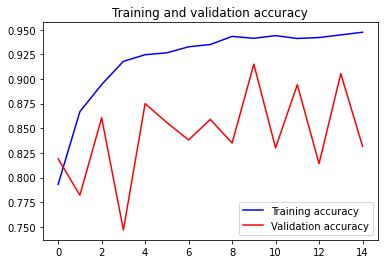

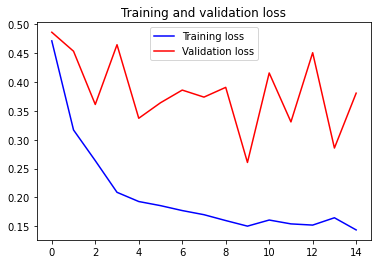

In [17]:
#training and validation data visulization:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
import numpy as np


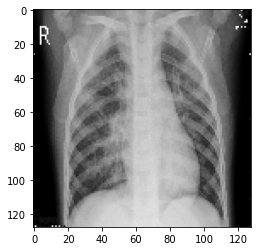

PNEUMONIA


In [21]:
#show and test image 
img=image.load_img('A:/downloads/archive/chest_xray/test/PNEUMONIA/person63_virus_121.jpeg',target_size=(128,128))
plt.imshow(img)
plt.show()
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result =classifier.predict(img)
if result[0] == 1:
  prediction = 'PNEUMONIA'
else:
  prediction = 'Normal'
print(prediction)